In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = 'Regression_model_prediction_data.xlsx'
sheet_name = 'tab'
#ファイル
df_excel = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
values = df_excel.values.tolist()

df = pd.DataFrame(values[1:], columns=values[0])

In [3]:
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sku_id         2270 non-null   object
 1   organic        2270 non-null   int64 
 2   a_campaign     2270 non-null   int64 
 3   b_campaign     2270 non-null   int64 
 4   actual_amount  2270 non-null   int64 
 5   item_id        2270 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 106.5+ KB


,organic,a_campaign,b_campaign,actual_amount,item_id
count,2270.000000,2270.000000,2270.000000,2270.000000,2.270000e+03
mean,3.102203,1.708370,4.811013,9.633480,1.619414e+09
std,13.876181,7.166193,19.229861,22.363371,4.480812e+08
min,-21.000000,0.000000,0.000000,1.000000,6.278897e+08
25%,0.000000,0.000000,0.000000,1.000000,1.258387e+09
50%,0.000000,0.000000,0.000000,3.000000,1.622723e+09
75%,0.000000,0.000000,0.000000,8.000000,2.004156e+09
max,294.000000,131.000000,366.000000,300.000000,2.537012e+09


In [4]:
df["organic"] = df["organic"].astype("float")
df["a_campaign"] = df["a_campaign"].astype("float")
df["b_campaign"] = df["b_campaign"].astype("float")
df["actual_amount"] = df["actual_amount"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sku_id         2270 non-null   object 
 1   organic        2270 non-null   float64
 2   a_campaign     2270 non-null   float64
 3   b_campaign     2270 non-null   float64
 4   actual_amount  2270 non-null   float64
 5   item_id        2270 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 106.5+ KB


In [7]:
df.columns

X = df[['organic', 'a_campaign', 'b_campaign']]
y = df['actual_amount']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#モデル構築
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.intercept_)
print(lm.coef_)

X_train.columns
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coef'])
print(cdf)

4.241541648836823
[0.90758807 1.04525067 0.21543812]
                Coef
organic     0.907588
a_campaign  1.045251
b_campaign  0.215438


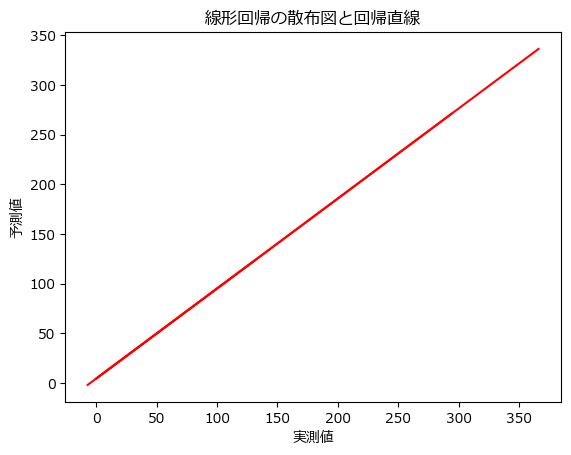

In [27]:
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'Meiryo'

# lm.intercept_ は切片、lm.coef_ は係数（配列）
# 線形回帰のフィット直線を描画
x1 = np.linspace(X_train.min(), X_train.max(), 100)  # x 軸の範囲を生成
y1 = lm.intercept_ + lm.coef_[0] * x1  # organic切片と傾きで直線の y 値を計算
plt.plot(x1, y1, color='red')  # 直線を追加

# 凡例とタイトルを追加
plt.xlabel('実測値')
plt.ylabel('予測値')
plt.title('線形回帰の散布図と回帰直線')
plt.show()

c:\Users\awse\anaconda3\envs\dataSci\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


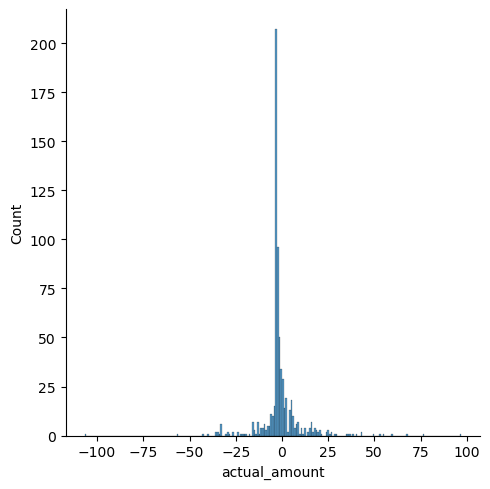

In [13]:
predictions = lm.predict(X_test)
predictions
sns.displot((y_test-predictions))

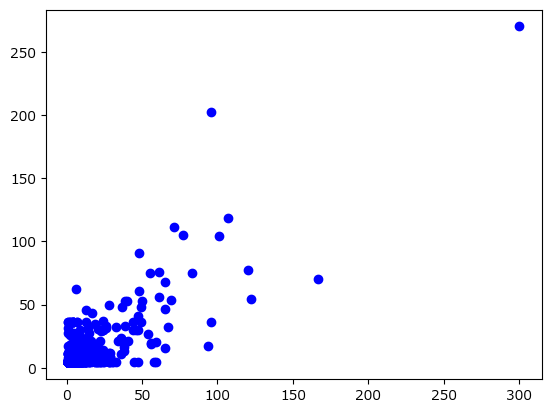

In [19]:
# 散布図を描画
plt.scatter(y_test, predictions, color='blue')

In [24]:
#決定係数
from sklearn.metrics import r2_score

# 実際の値 (y_test) と予測値 (predictions)
r2 = r2_score(y_test, predictions)
print(f"決定係数 (R²): {r2}")


決定係数 (R²): 0.6222236041919436
